In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Nadam

In [2]:
def datapreprocessing(data):
    data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mode().iloc[0])

In [3]:
# Load data
training_data = pd.read_csv('/kaggle/input/sdataset/train.csv')
testing_data = pd.read_csv('/kaggle/input/sdataset/test.csv')

In [4]:
# Data Preprocessing
datapreprocessing(training_data)
datapreprocessing(testing_data)

In [5]:
# Check for null values in training data
training_data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Traveler Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
contentment                          0
dtype: int64

In [6]:
# Display basic information about the training data
print("Training Data Info:")
print(training_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Traveler Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location      

In [7]:
# Display basic information about the testing data
print("\nTesting Data Info:")
print(testing_data.info())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Traveler Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                     

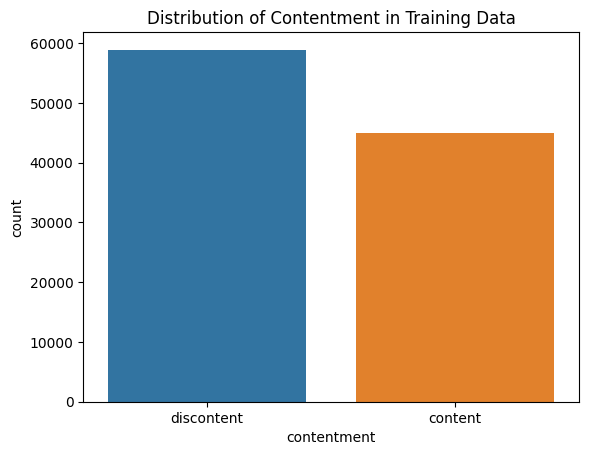

In [8]:
# Explore the distribution of the target variable
sns.countplot(x='contentment', data=training_data)
plt.title('Distribution of Contentment in Training Data')
plt.show()

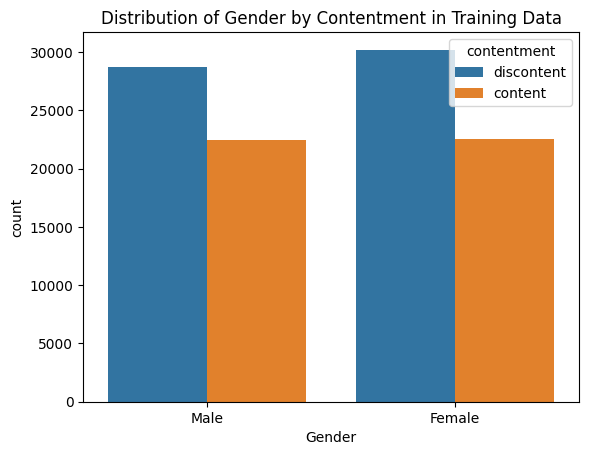

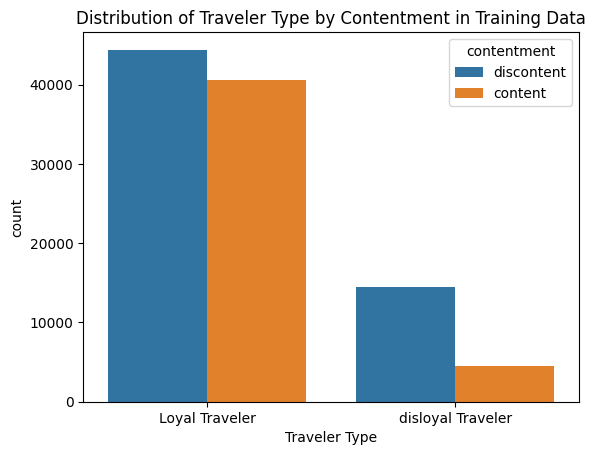

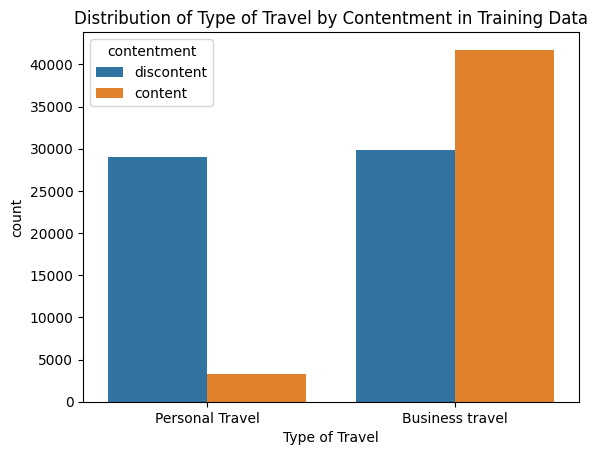

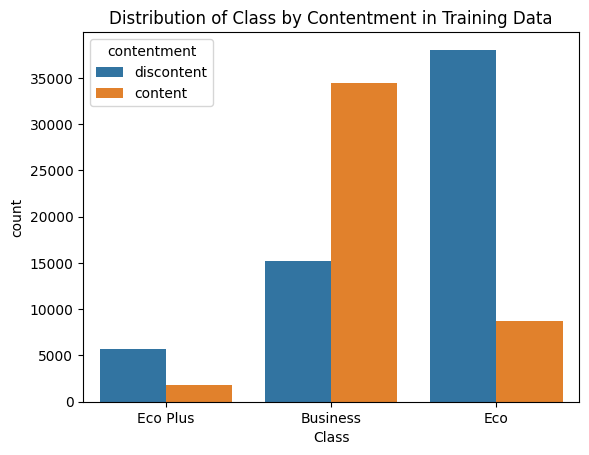

In [9]:
# Explore the distribution of categorical features
categorical_features = ['Gender', 'Traveler Type', 'Type of Travel', 'Class']
for feature in categorical_features:
    sns.countplot(x=feature, hue='contentment', data=training_data)
    plt.title(f'Distribution of {feature} by Contentment in Training Data')
    plt.show()

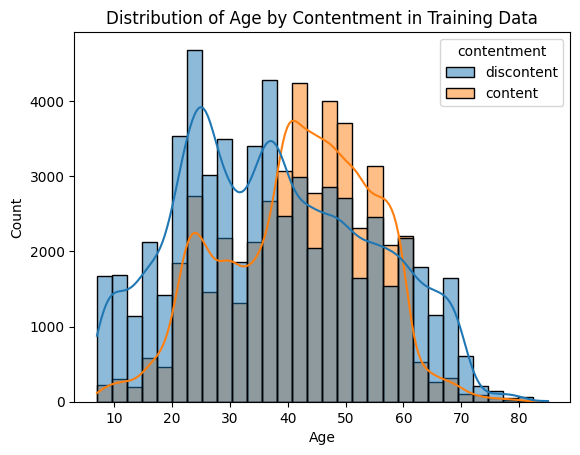

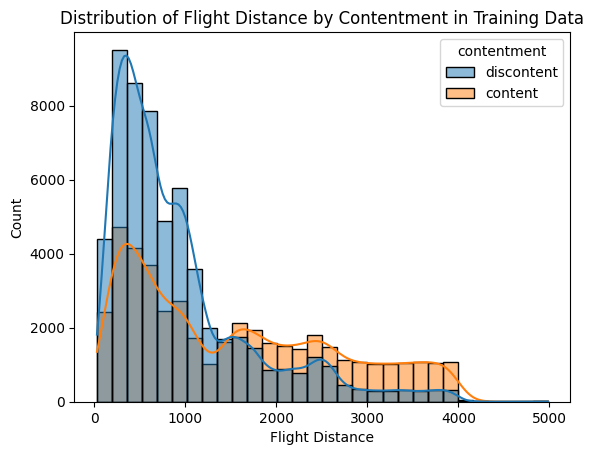

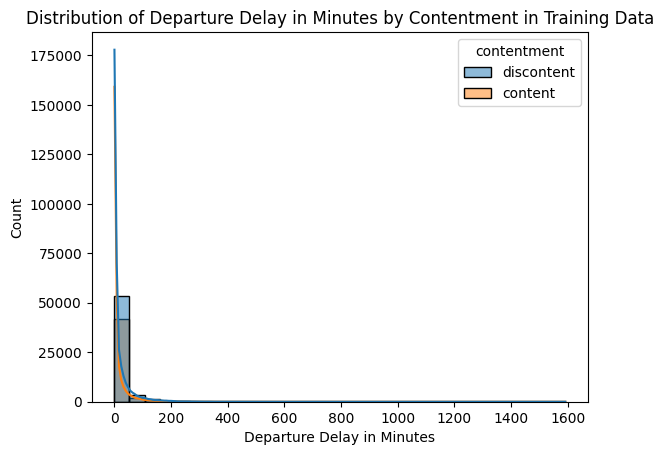

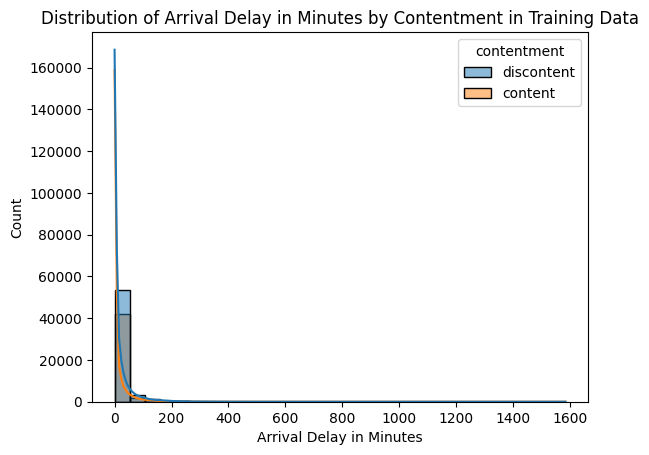

In [10]:
# Explore the distribution of numerical features
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
for feature in numerical_features:
    sns.histplot(x=feature, hue='contentment', data=training_data, kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Contentment in Training Data')
    plt.show()

In [12]:
# Explore correlation between numerical features
numerical_columns = training_data.select_dtypes(include=[np.number]).columns
correlation_matrix = training_data[numerical_columns].corr()

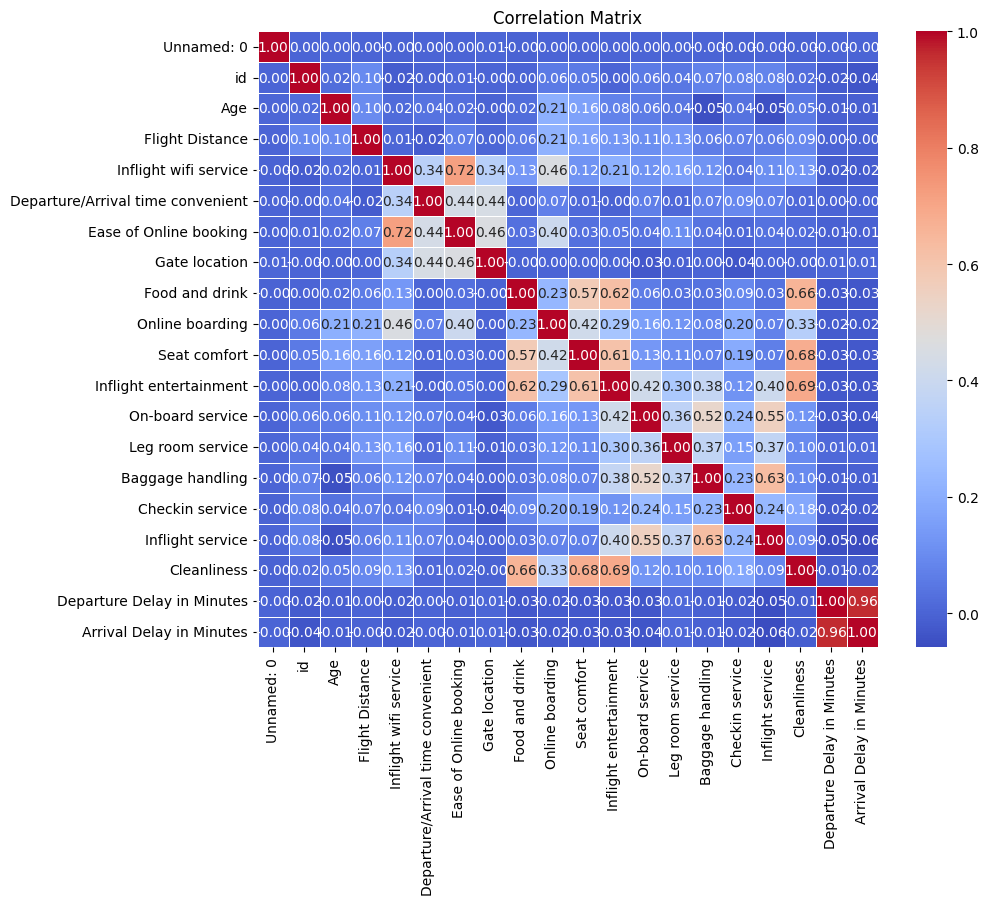

In [17]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))# Draw the heatmap with a more readable annotation format
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Extract features and target variable
X = training_data.drop('contentment', axis=1)
X = pd.get_dummies(X)
Y = pd.get_dummies(training_data['contentment'], drop_first=True)

In [19]:
# Further preprocessing
X = X.iloc[:, 2:]
X_test = pd.get_dummies(testing_data).iloc[:, 2:]

In [20]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [22]:
# Define different neural network architectures
models = [
    # Model 1
    keras.Sequential([
        keras.layers.Flatten(input_shape=(27,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]),

    # Model 2
    keras.Sequential([
        keras.layers.Flatten(input_shape=(27,)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]),

    # Model 3
    keras.Sequential([
        keras.layers.Flatten(input_shape=(27,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]),

    # Model 4
    keras.Sequential([
        keras.layers.Flatten(input_shape=(27,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(48, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  # Change the number of neurons to 1 for binary classification
    ])
]

In [23]:
# Train and evaluate each model
for i, model in enumerate(models, start=1):
    print(f"\nTraining Model {i}")
    
    # Compile the model
    model.compile(optimizer=Nadam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X, Y, validation_split=0.1, epochs=20)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Convert probabilities to binary predictions
    target = (y_pred > 0.5).astype(int)
    
    # Create a DataFrame for submission
    result = pd.DataFrame({'id': testing_data['id'], 'Target': target.flatten()})
    
    # Map target labels to contentment categories
    result['contentment'] = result['Target'].map({1: 'neutral or discontent', 0: 'content'})
    
    # Drop unnecessary columns
    result = result.drop(['Target'], axis=1)
    
    # Save the result to a CSV file
    result.to_csv(f'sample_submission_model_{i}.csv', index=False)



Training Model 1
Epoch 1/20
2923/2923 [==============================] - 9s 3ms/step - loss: 0.1853 - accuracy: 0.9255 - val_loss: 0.1296 - val_accuracy: 0.9492
Epoch 2/20
2923/2923 [==============================] - 7s 2ms/step - loss: 0.1263 - accuracy: 0.9473 - val_loss: 0.1102 - val_accuracy: 0.9520
Epoch 3/20
2923/2923 [==============================] - 7s 2ms/step - loss: 0.1118 - accuracy: 0.9527 - val_loss: 0.0998 - val_accuracy: 0.9590
Epoch 4/20
2923/2923 [==============================] - 7s 2ms/step - loss: 0.1047 - accuracy: 0.9545 - val_loss: 0.1002 - val_accuracy: 0.9570
Epoch 5/20
2923/2923 [==============================] - 7s 2ms/step - loss: 0.0997 - accuracy: 0.9568 - val_loss: 0.0936 - val_accuracy: 0.9610
Epoch 6/20
2923/2923 [==============================] - 7s 2ms/step - loss: 0.0972 - accuracy: 0.9577 - val_loss: 0.0939 - val_accuracy: 0.9619
Epoch 7/20
2923/2923 [==============================] - 7s 3ms/step - loss: 0.0949 - accuracy: 0.9588 - val_loss: 0.09